<a href="https://colab.research.google.com/github/mariiacamila31/sma_reit/blob/main/Simple_Moving_Average_REIT_EQIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Price prediction using Simple Moving Average (SMA): Equinix (Nasdaq:"EQIX")**

1. **Historical Performance**: EQIX has demonstrated consistent performance over time, with relatively stable returns compared to other real estate investments. This stability can be attributed to various factors, such as its diversified portfolio, strong management team, and solid financial fundamentals.

2. **Diversification**: EQIX operates in the data center real estate sector, which has shown resilience even during economic downturns. The increasing demand for data storage and cloud services has contributed to EQIX's stable revenue streams and growth prospects..

3. **Strong Market Position**: EQIX is a leading player in the data center industry, with a global footprint and a strong reputation for reliability and quality of service. Its established presence in key markets and long-term customer relationships contribute to its stability and resilience.

4. **Financial Strength**: EQIX has a track record of sound financial management, with healthy balance sheets, steady cash flows, and manageable debt levels. This financial stability provides a solid foundation for future growth and dividends.

5. **Risk Management**: EQIX employs rigorous risk management practices to mitigate potential risks, including market volatility, regulatory changes, and technological disruptions. This proactive approach helps to safeguard investor interests and maintain stability in performance.

Overall, the choice of REIT EQIX as a steady and reliable real estate investment is supported by its historical performance, diversification, strong market position, financial strength, and risk management practices. Investors seeking stability and long-term growth potential may find EQIX to be an attractive option in their investment portfolio.

In [224]:
#Import the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr

##1. Load the and clean the data

In [250]:
# Define the ticker
eqix = "EQIX"

# Download the historical data using Yahoo Finance, 10 years
reit_data = yf.download(eqix, start = "2014-05-24", end = "2024-05-24")

# View the data
reit_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-27,197.449997,198.380005,196.539993,198.169998,152.139908,945300
2014-05-28,197.750000,199.669998,197.169998,198.520004,152.408615,769000
2014-05-29,198.960007,200.460007,198.070007,199.559998,153.207047,589600
2014-05-30,199.639999,199.639999,196.919998,198.750000,152.585159,506800
2014-06-02,199.110001,200.580002,197.339996,200.070007,153.598587,517100


In [251]:
# View the shape of the data
reit_data.shape

(2517, 6)

In [252]:
# Get the main statistics
reit_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,526.923043,532.628156,520.829508,526.978038,487.565087,5.569971e+05
std,198.868831,201.065232,196.301927,198.747163,206.757769,4.045121e+05
min,190.000000,193.889999,189.550003,191.960007,147.587357,8.260000e+04
25%,369.450012,373.089996,366.720001,369.750000,320.574768,3.664000e+05
50%,487.609985,493.910004,483.660004,488.809998,445.716614,4.729000e+05
75%,712.859985,720.000000,703.289978,712.679993,682.689270,6.381000e+05
max,912.000000,914.929993,905.450012,913.659973,908.765869,1.325100e+07


In [253]:
# Display the data types of all the columns
reit_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

##2. Create visualizations

In [254]:
# We will use only the adjusted closing price for the analysis
eqix = pd.DataFrame(reit_data["Adj Close"].round(2))
eqix.head()

,Adj Close
Date,
2014-05-27,152.14
2014-05-28,152.41
2014-05-29,153.21
2014-05-30,152.59
2014-06-02,153.60


In [255]:
# Get the main statistics of the adjusted price only
eqix.describe()

,Adj Close
count,2517.000000
mean,487.565117
std,206.757808
min,147.590000
25%,320.570000
50%,445.720000
75%,682.690000
max,908.770000


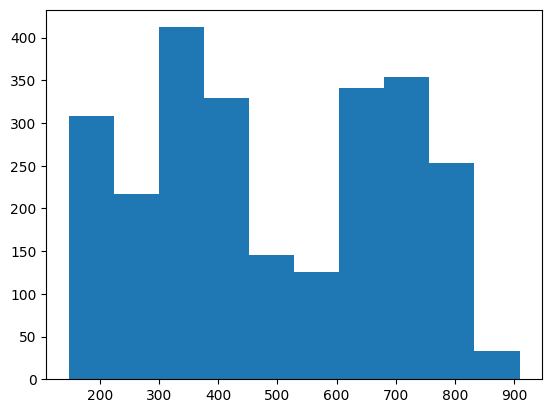

In [256]:
# Create a histogram to understand the data distribution
plt.hist(eqix);

Clearly most of the data lies within the ranges of `$300 `
 to `$400` and from `$600` to `$800`. The data is not skewed to the right or left, because the mean is `$487.57` and the median is `$445.72`      

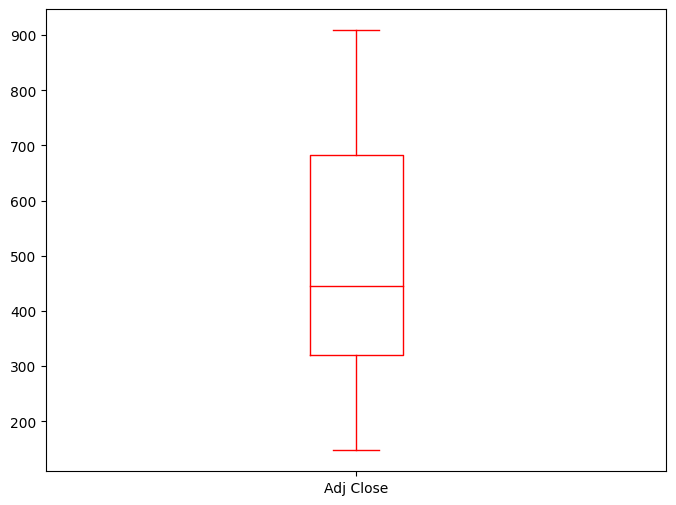

In [257]:
# Create a boxplot
eqix.plot(kind = "box", color = "red", figsize = (8,6));

The boxplot reveals the following insights:

1. The **interquartile range** spans approximately from `$300` to nearly `$700`, representing the range within which the majority of prices in the dataset fluctuated.

2. The **median**, depicted by the line within the box, stands at approximately `$450`, representing the central value of the entire dataset.

3. The **lower and upper whiskers** extend to approximately `$100` and `$900`, respectively, indicating the lowest and highest observed values in the dataset.

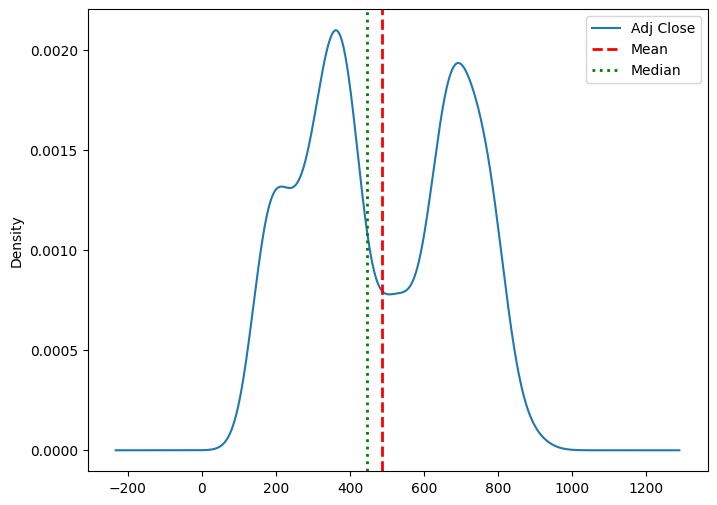

In [258]:
# Density plot
den = eqix["Adj Close"].plot(kind = "density", figsize = (8,6));
den.axvline(eqix["Adj Close"].mean(), color = "red", linestyle = "--", linewidth = 2, label = "Mean");
den.axvline(eqix["Adj Close"].median(), color="green", linestyle= "dotted", linewidth=2, label='Median');
plt.legend();

###**Note:**
Since the mean and median exhibit close proximity to each other, it suggests a stability in prices throughout the entire dataset.

##3. Calculate the metrics which will serve as features

**Simple Moving Averages (SMA)** are a statistical technique used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles in data.

- **Definition**: SMA calculates the average of a specified number of data points over a given period, giving equal weight to all data points within the period.
  
- **Calculation**: To calculate a Simple Moving Average, you sum up the values of the data points over the specified period and then divide by the number of data points.

- **Smoothing Effect**: SMA smooths out noise and random fluctuations in the data, providing a clearer picture of the underlying direction of the data.


In [259]:
# Set the date as the index column
eqix.index = pd.to_datetime(eqix.index)
eqix.reset_index(inplace = True)
eqix.rename(columns={"index" : "Date"}, inplace = True)

# Show the changes
eqix.head(10)

,Date,Adj Close
0,2014-05-27,152.14
1,2014-05-28,152.41
2,2014-05-29,153.21
3,2014-05-30,152.59
4,2014-06-02,153.60
5,2014-06-03,151.03
6,2014-06-04,153.41
7,2014-06-05,153.59
8,2014-06-06,155.06
9,2014-06-09,154.85


In [260]:
# Calculate the 20, 50 day simple moving average
eqix["SMA_10"] = eqix["Adj Close"].rolling(window = 10).mean().round(2)
eqix["SMA_20"] = eqix['Adj Close'].rolling(window = 20).mean().round(2)
eqix["SMA_50"] = eqix["Adj Close"].rolling(window = 50).mean().round(2)

# Show the results
eqix.head(50)

,Date,Adj Close,SMA_10,SMA_20,SMA_50
0,2014-05-27,152.14,NaN,NaN,NaN
1,2014-05-28,152.41,NaN,NaN,NaN
2,2014-05-29,153.21,NaN,NaN,NaN
3,2014-05-30,152.59,NaN,NaN,NaN
4,2014-06-02,153.60,NaN,NaN,NaN
5,2014-06-03,151.03,NaN,NaN,NaN
6,2014-06-04,153.41,NaN,NaN,NaN
7,2014-06-05,153.59,NaN,NaN,NaN
8,2014-06-06,155.06,NaN,NaN,NaN
9,2014-06-09,154.85,153.19,NaN,NaN


In [261]:
# Before we train the model we need to drop all of the NaN values, this will be the first 10,20 and 50 for the SMA calculated above
eqix = eqix.dropna()

# Show the changes
eqix.head(50)
eqix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2468 entries, 49 to 2516
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2468 non-null   datetime64[ns]
 1   Adj Close  2468 non-null   float64       
 2   SMA_10     2468 non-null   float64       
 3   SMA_20     2468 non-null   float64       
 4   SMA_50     2468 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 115.7 KB


* Now there are 2,468 rows

## 4. Evaluate the significance of the predictors

* For this we will use the p-value: A p-value (typically < 0.05) indicates that the correlation is statistically significant which means that it is likely the finding is real, reliable, and not due to chance.

In [262]:
# Select only numeric variables (excluding datetime variables)
numeric_eqix = eqix.select_dtypes(include=['float64', 'int64'])

# Calculate correlation coefficients and p-values
corr_matrix = numeric_eqix.corr(method='pearson')
p_values = numeric_eqix.apply(lambda x: pearsonr(numeric_eqix[x.name], numeric_eqix["Adj Close"])[1])

# Print correlation coefficients and p-values
print("Correlation Coefficients:")
print(corr_matrix)

print("\nP-values:")
print(p_values.round(6))

Correlation Coefficients:
           Adj Close    SMA_10    SMA_20    SMA_50
Adj Close   1.000000  0.997370  0.994538  0.988332
SMA_10      0.997370  1.000000  0.998547  0.992315
SMA_20      0.994538  0.998547  1.000000  0.995676
SMA_50      0.988332  0.992315  0.995676  1.000000

P-values:
Adj Close    0.0
SMA_10       0.0
SMA_20       0.0
SMA_50       0.0
dtype: float64


In [263]:
#Evaluate the correlation of each variable to the target price
pearson_correlation = eqix.corr(method = "pearson")["Adj Close"]

#Find the variable with the highest correlation
best_predictor = pearson_correlation.drop("Adj Close").idxmax()

#Print the results
print(f"The Pearson correlation coefficients:")
print(pearson_correlation)

The Pearson correlation coefficients:
Date         0.947279
Adj Close    1.000000
SMA_10       0.997370
SMA_20       0.994538
SMA_50       0.988332
Name: Adj Close, dtype: float64


In [277]:
#Print the best predictor
print(f"The best predictor of the Adjusted Closing price is: '{best_predictor}' with a correlation coefficient of {pearson_correlation[best_predictor].round(4)}")
print("Moreover, the simple moving average of the 10-day window often provides a smoothed trend of the target variable, making it a reliable predictor.")

The best predictor of the Adjusted Closing price is: 'SMA_10' with a correlation coefficient of 0.9974
Moreover, the simple moving average of the 10-day window often provides a smoothed trend of the target variable, making it a reliable predictor.


## 5. Modeling

In [265]:
# Define the variables
drop = ["Date", "Adj Close"]
X = eqix.drop(columns = drop, inplace = False) #Independent variables
y = eqix["Adj Close"] #Target variable

# Train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
maep = mean_absolute_percentage_error(y_test, y_pred) # Average error for the predictions
r2 = r2_score(y_test, y_pred) # Goodness of fit

# Print the metrics
print(f"The mean absolute percentage error of the model is: {maep:.2f}%")
print(f"The R^2 of the model is:{r2.round(4)}")

The mean absolute percentage error of the model is: 0.02%
The R^2 of the model is:0.9954


##Interpretation:

1. A **Mean Absolute Percentage Error (MAPE)** below 5% indicates that the forecasted values closely align with the actual values, with an average deviation of less than 5%. This level of accuracy is widely accepted as satisfactory in forecasting applications.

1. In finance, an **R-squared** value above 0.7 is typically considered indicative of a strong correlation between the model's predictions and the actual values. Our model, with an R-squared value exceeding 0.99, demonstrates an exceptionally high level of correlation. Technically, this means that over 99% of the variability in the target variable (price) can be explained by the independent variables (features) included in the model. In simpler terms, our model's predictions closely follow the actual values, aligning well with the observed trends in the data."

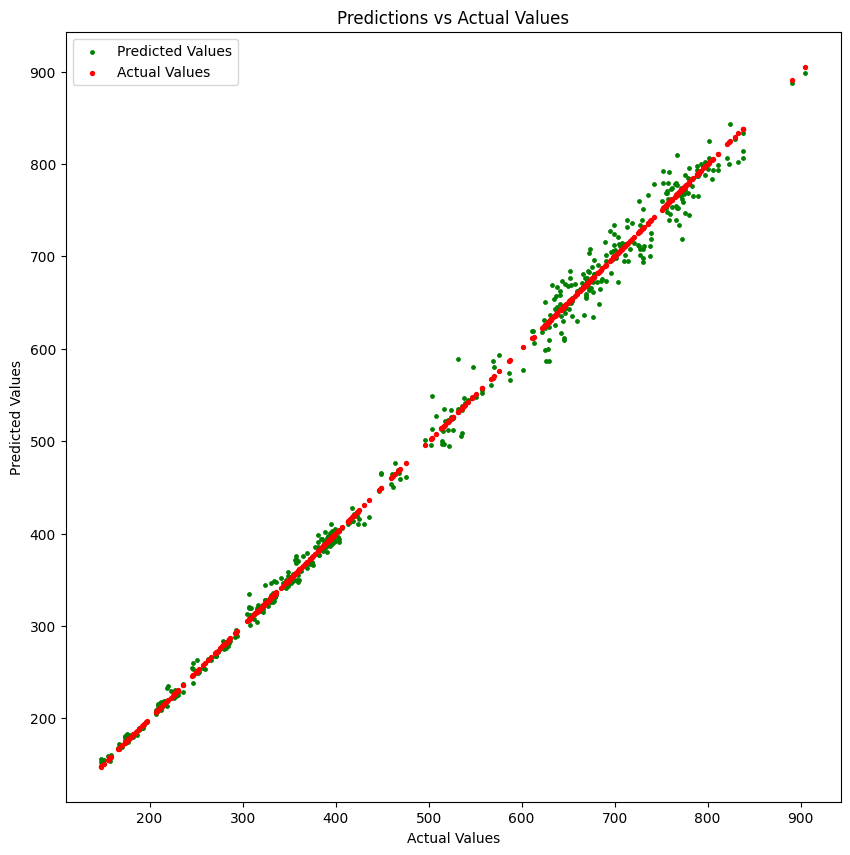

In [275]:
# Plot predictions vs actual prices
plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred, color="green", label="Predicted Prices", s=6)
plt.scatter(y_test, y_test, color="red", label="Actual Prices", s=8)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predictions vs Actual Prices")
plt.legend()
plt.show()

##6. Conclusion:

The model highlights a **strong linear correlation between the predicted prices and the calculated simple moving averages.** However, an intriguing observation emerges as the variation (depicted by the green dots) appears to increase when prices start to rise, before reverting to their typical trend. This phenomenon reflects a temporary divergence in the variability of the residuals, known as heteroscedasticity, wherein the spread of residuals changes in relation to the predicted values.

This behavior can be attributed to the nature of Simple Moving Averages (SMAs). When prices surge rapidly, SMAs require time to catch up, leading to a temporary discrepancy between predicted and observed values. Despite this, the model demonstrates reliability by effectively adapting to market dynamics. It showcases the ability to normalize itself, ultimately maintaining accurate predictions even amidst a bullish market trend.

**References:**

1. https://www.equixinc.com/about/history/

2. https://www.nasdaq.com/articles/heres-why-you-should-buy-equinix-eqix-stock-for-now

3. https://www.schwab.com/learn/story/how-to-trade-simple-moving-averages#:~:text=The%20most%20commonly%20used%20moving,dividing%20that%20number%20by%2020.

4. https://www.investopedia.com/terms/s/sma.asp

5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

7. https://docs.oracle.com/en/cloud/saas/planning-budgeting-cloud/pfusu/insights_metrics_MAPE.html#:~:text=Mean%20absolute%20percentage%20error%20is,accuracy%20between%20time%2Dseries%20models.

8. https://www.investopedia.com/terms/r/r-squared.asp

9. https://www.investopedia.com/terms/p/p-value.asp

10. https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

11. https://www.investopedia.com/terms/m/mlr.asp#:~:text=Key%20Takeaways-,Multiple%20linear%20regression%20(MLR)%2C%20also%20known%20simply%20as%20multiple,uses%20just%20one%20explanatory%20variable.